# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
from mlp_py import PyMLP
from regression_simple_py import PyLinearRegression, PyClassification
from rbf_py import PyRBF

# Cas de tests, rendu 3

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [4]:
X = np.array([
      [0.5, 0.7],
      [0.4, 0.5],
      [0.6, 0.6],
      [0.1, 0.7],
      [0.2, 0.8],
      [0.6, 0.4],
      [0.8, 0.6],
      [0.9, 0.3],
      [0.8, 0.1],
      [0.3, 0.1]
])
Y = np.array([
      -1.0,
      -1.0,
      -1.0,
      -1.0,
      -1.0,
      1.0,
      1.0,
      1.0,
      1.0,
      1.0
])

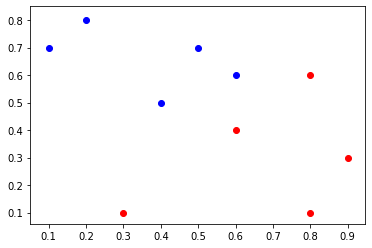

<Figure size 432x288 with 0 Axes>

In [5]:
plt.scatter(X[0:5, 0], X[0:5, 1], color='blue')
plt.scatter(X[5:10,0], X[5:10,1], color='red')
plt.show()
plt.clf()

#### Create models

In [6]:
#Linear
alpha = 0.01
lin_class = PyClassification(X.shape[1], alpha)

#MLP
layers = [X.shape[1], 1]
lr = 0.01
mlp = PyMLP(layers, lr, classification_mode=True)

#RBF
n_centroids = 5
rbf = PyRBF(n_centroids, 
            n_samples=X.shape[0],
           n_features=X.shape[1],
           n_outputs=1,
           classification_mode=True)

#### Train models

In [ ]:
#Linear
lin_class.fit(X, Y)

#MLP
mlp.fit(X, Y, 100)

#RBF
#norm_gamma defines the value of gamma 
#if norm_gamma=True, recalculate gamma by max(distance[i,j]) / nb_centroids
#where i, j are 2 centroids
#if norm_gamma=False, use the init value
#defaut False
rbf.fit(X, Y, norm_gamma=True)

In [22]:
# Après entrainement
nb_errors_linear = 0
nb_errors_mlp = 0
nb_errors_rbf = 0

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP') + '  |  ' + '{: <20}'.format('RBF'))
for i, inputs_k in enumerate(X, start=0):
    linear_find = my_lib.linear_predict_model_classification(
        linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    mlp_find = my_lib.mlp_predict_classification(
        mlp_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    
    rbf_find = my_lib.rbf_predict_classification(
        rbf_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]

    
    expect = Y[i]
    
    if linear_find != expect:
        nb_errors_linear += 1
    if abs(mlp_find - expect) > 0.1:
        nb_errors_mlp += 1
    if rbf_find != expect:
        nb_errors_rbf += 1
    
    print('{: <20}'.format(expect) + '  |  ' + '{: <20}'.format(linear_find) + '  |  ' + '{: <20}'.format(mlp_find) + '  |  ' + '{: <20}'.format(rbf_find))
print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

Expected              |  Linear                |  MLP                   |  RBF                 
-1.0                  |  1.0                   |  -0.5311359888284521   |  -1.0                
-1.0                  |  1.0                   |  0.24257351718926812   |  1.0                 
-1.0                  |  1.0                   |  -0.4938161180750181   |  -1.0                
-1.0                  |  1.0                   |  0.05210116405738972   |  -1.0                
-1.0                  |  -1.0                  |  -0.7751384795879672   |  -1.0                
1.0                   |  1.0                   |  -0.14925459454732226  |  1.0                 
1.0                   |  1.0                   |  0.37328408831394067   |  1.0                 
1.0                   |  1.0                   |  -0.37067024419276084  |  -1.0                
1.0                   |  1.0                   |  0.4219261856874741    |  -1.0                
1.0                   |  1.0            

# Séparation Linéaire

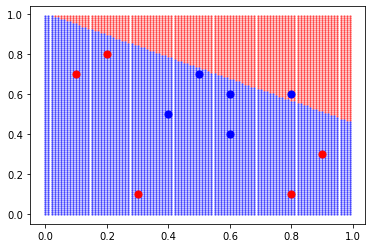

<Figure size 432x288 with 0 Axes>

In [23]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.linear_predict_model_classification(
            linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    if predicted_value > 0.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:5, 0], X[0:5, 1], color='blue', s=50)
plt.scatter(X[5:10, 0], X[5:10, 1], color='red', s=50)
plt.show()
plt.clf()


# Séparation MLP

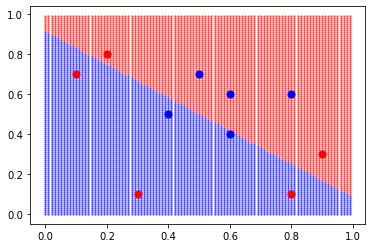

<Figure size 432x288 with 0 Axes>

In [24]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.mlp_predict_classification(
            mlp_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    
    if predicted_value > 0.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:5, 0], X[0:5, 1], color='blue', s=50)
plt.scatter(X[5:10, 0], X[5:10, 1], color='red', s=50)
plt.show()
plt.clf()


# Séparation RBF

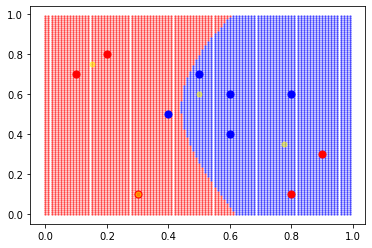

<Figure size 432x288 with 0 Axes>

In [25]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.rbf_predict_classification(
            rbf_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    
    if predicted_value < 0.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:5, 0], X[0:5, 1], color='blue', s=50)
plt.scatter(X[5:10, 0], X[5:10, 1], color='red', s=50)

clusters = my_lib.rbf_get_clusters(rbf_model)
for i in range(nb_clusters_rbf):
        plt.scatter(clusters[i * X.shape[1]], clusters[i * X.shape[1] + 1], color='yellow', alpha=0.5, s=25)

plt.show()
plt.clf()


# Libération des modèles

In [26]:
my_lib.linear_dispose_model(linear_model, len(X[0]))
my_lib.mlp_dispose(mlp_model)
my_lib.rbf_dispose(rbf_model)

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [33]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50)), np.ones((50)) * -1.0])

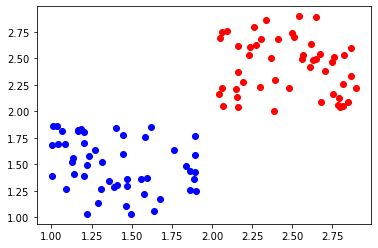

<Figure size 432x288 with 0 Axes>

In [34]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

# Création des modèles

In [42]:
flattened_X = X.flatten()
linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

layers = [2, 1]
layers = np.array(layers)
mlp_model = my_lib.mlp_create_model(layers.ctypes.data_as(ctypes.POINTER(ctypes.c_int)), layers.shape[0])

rbf_model = my_lib.rbf_create_model(X.shape[0], 1, 0.01)

# Entrainement des modèles

In [43]:
nb_clusters_rbf = 2

#Linear
my_lib.linear_train_model_classification(
        linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        0.01,
        1000
    )

#MLP
my_lib.mlp_train_classification(
        mlp_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        0.001,
        10000000
    )

#RBF
my_lib.rbf_train(
        rbf_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        nb_clusters_rbf
    )

In [44]:
# Après entrainement
nb_errors_linear = 0
nb_errors_mlp = 0
nb_errors_rbf = 0

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP'))
for i, inputs_k in enumerate(X, start=0):
    linear_find = my_lib.linear_predict_model_classification(
        linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    mlp_find = my_lib.mlp_predict_classification(
        mlp_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )[0]
    
    rbf_find = my_lib.rbf_predict_classification(
        rbf_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]

    
    expect = Y[i]
    
    if linear_find != expect:
        nb_errors_linear += 1
    if abs(mlp_find - expect) > 0.1:
        nb_errors_mlp += 1
    if rbf_find != expect:
        nb_errors_rbf += 1
    
    # print('{: <20}'.format(expect) + '  |  ' + '{: <20}'.format(linear_find) + '  |  ' + '{: <20}'.format(mlp_find))
print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

Expected              |  Linear                |  MLP                 

Linear errors : 0
MLP errors : 5
RBF errors : 100


# Séparation Linéaire

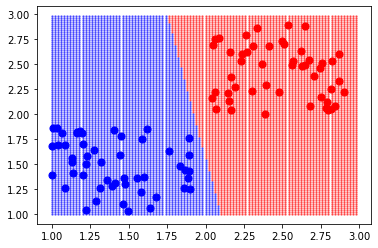

<Figure size 432x288 with 0 Axes>

In [45]:
nb_points = 100
test_points = np.array([[i, j] for i in range(nb_points) for j in range(nb_points)], dtype='float64') / nb_points * 2.0 + 1.0

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.linear_predict_model_classification(
            linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    if predicted_value > 0.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', s=50)
plt.scatter(X[51:100, 0], X[51:100, 1], color='red', s=50)
plt.show()
plt.clf()


# Séparation MLP

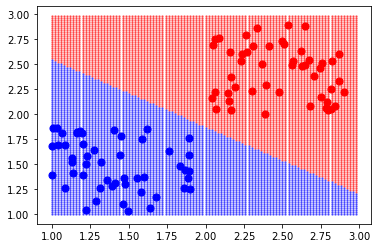

<Figure size 432x288 with 0 Axes>

In [46]:
nb_points = 100
test_points = np.array([[i, j] for i in range(nb_points) for j in range(nb_points)], dtype='float64') / nb_points * 2.0 + 1.0

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.mlp_predict_classification(
            mlp_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    
    if predicted_value > 0.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', s=50)
plt.scatter(X[51:100, 0], X[51:100, 1], color='red', s=50)
plt.show()
plt.clf()


# Séparation RBF

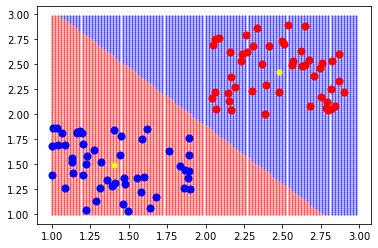

<Figure size 432x288 with 0 Axes>

In [47]:
nb_points = 100
test_points = np.array([[i, j] for i in range(nb_points) for j in range(nb_points)], dtype='float64') / nb_points * 2.0 + 1.0

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.rbf_predict_classification(
            rbf_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    
    if predicted_value > 0.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', s=50)
plt.scatter(X[51:100, 0], X[51:100, 1], color='red', s=50)

clusters = my_lib.rbf_get_clusters(rbf_model)
for i in range(nb_clusters_rbf):
        plt.scatter(clusters[i * X.shape[1]], clusters[i * X.shape[1] + 1], color='yellow', s=25)

plt.show()
plt.clf()


# Libération des modèles

In [48]:
my_lib.linear_dispose_model(linear_model, len(X[0]))
my_lib.mlp_dispose(mlp_model)
my_lib.rbf_dispose(rbf_model)

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [35]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype='float64')
Y = np.array([1, 1, -1, -1], dtype='float64')

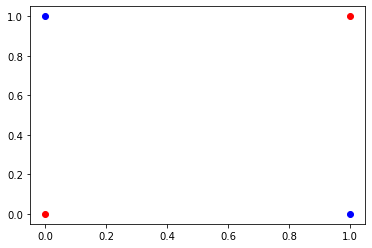

<Figure size 432x288 with 0 Axes>

In [36]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

# Création des modèles

In [37]:
flattened_X = X.flatten()
linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

layers = [2, 2, 1]
layers = np.array(layers)
mlp_model = my_lib.mlp_create_model(layers.ctypes.data_as(ctypes.POINTER(ctypes.c_int)), layers.shape[0])

rbf_model = my_lib.rbf_create_model(X.shape[0], 1, 0.01)

# Entrainement des modèles

In [38]:
nb_clusters_rbf = 0

#Linear
my_lib.linear_train_model_classification(
        linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        0.01,
        1000
    )

#MLP
my_lib.mlp_train_classification(
        mlp_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        0.001,
        1000000
    )
#RBF
my_lib.rbf_train(
        rbf_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        nb_clusters_rbf
    )

In [39]:
# Après entrainement
nb_errors_linear = 0
nb_errors_mlp = 0
nb_errors_rbf = 0

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP'))
for i, inputs_k in enumerate(X, start=0):
    linear_find = my_lib.linear_predict_model_classification(
        linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    mlp_find = my_lib.mlp_predict_classification(
        mlp_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )[0]
    
    rbf_find = my_lib.rbf_predict_classification(
        rbf_model,
        test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    
    expect = Y[i]
    
    if linear_find != expect:
        nb_errors_linear += 1
    if abs(mlp_find - expect) > 0.1:
        nb_errors_mlp += 1
    if rbf_find != expect:
        nb_errors_rbf += 1
    
    print('{: <20}'.format(expect) + '  |  ' + '{: <20}'.format(linear_find) + '  |  ' + '{: <20}'.format(mlp_find))
print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

Expected              |  Linear                |  MLP                 
1.0                   |  1.0                   |  0.9752625504176282  
1.0                   |  -1.0                  |  0.9751888301604035  
-1.0                  |  1.0                   |  -0.9796261275805948 
-1.0                  |  1.0                   |  -0.9824002647187177 

Linear errors : 3
MLP errors : 0
RBF errors : 2


# Séparation Linéaire

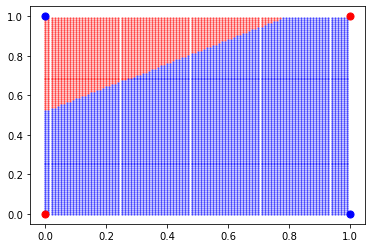

<Figure size 432x288 with 0 Axes>

In [40]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.linear_predict_model_classification(
            linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    if predicted_value > 0.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue', s=50)
plt.scatter(X[2:4, 0], X[2:4, 1], color='red', s=50)
plt.show()
plt.clf()


# Séparation MLP

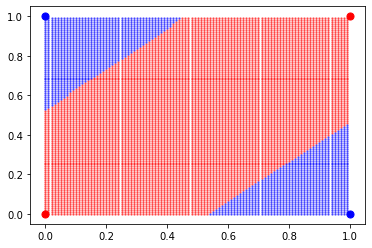

<Figure size 432x288 with 0 Axes>

In [41]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.mlp_predict_classification(
            mlp_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    
    if predicted_value > 0.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue', s=50)
plt.scatter(X[2:4, 0], X[2:4, 1], color='red', s=50)
plt.show()
plt.clf()


# Séparation RBF

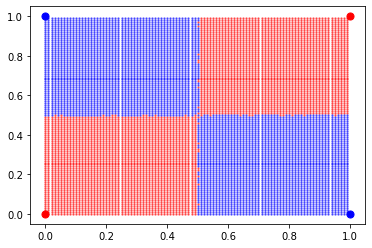

<Figure size 432x288 with 0 Axes>

In [42]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.rbf_predict_classification(
            rbf_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    
    if predicted_value > 0.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue', s=50)
plt.scatter(X[2:4, 0], X[2:4, 1], color='red', s=50)

clusters = my_lib.rbf_get_clusters(rbf_model)
for i in range(nb_clusters_rbf):
        plt.scatter(clusters[i * X.shape[1]], clusters[i * X.shape[1] + 1], color='yellow', s=25)

plt.show()
plt.clf()


# Libération des modèles

In [43]:
my_lib.linear_dispose_model(linear_model, len(X[0]))
my_lib.mlp_dispose(mlp_model)
my_lib.rbf_dispose(rbf_model)

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [44]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X], dtype='float64')

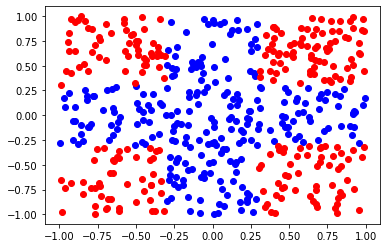

<Figure size 432x288 with 0 Axes>

In [45]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

# Création des modèles

In [46]:
flattened_X = X.flatten()
linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

layers = [2, 4, 1]
layers = np.array(layers)
mlp_model = my_lib.mlp_create_model(layers.ctypes.data_as(ctypes.POINTER(ctypes.c_int)), layers.shape[0])

rbf_model = my_lib.rbf_create_model(X.shape[0], 1, 0.1)

# Entrainement des modèles

In [47]:
nb_clusters_rbf = 0

#Linear
rbf_nb_clusters = 0

my_lib.linear_train_model_classification(
        linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        0.01,
        1000
    )

#MLP
my_lib.mlp_train_classification(
        mlp_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        0.01,
        1000000
    )
#RBF
my_lib.rbf_train(
        rbf_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        nb_clusters_rbf
    )

In [48]:
# Après entrainement
nb_errors_linear = 0
nb_errors_mlp = 0
nb_errors_rbf = 0

print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP'))
for i, inputs_k in enumerate(X, start=0):
    linear_find = my_lib.linear_predict_model_classification(
        linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    mlp_find = my_lib.mlp_predict_classification(
        mlp_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )[0]
    
    rbf_find = my_lib.rbf_predict_classification(
        rbf_model,
        test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    
    expect = Y[i]
    
    if linear_find != expect:
        nb_errors_linear += 1
    if abs(mlp_find - expect) > 0.1:
        nb_errors_mlp += 1
    if rbf_find != expect:
        nb_errors_rbf += 1
    
    # print('{: <20}'.format(expect) + '  |  ' + '{: <20}'.format(linear_find) + '  |  ' + '{: <20}'.format(mlp_find))
print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))
print("RBF errors : " + str(nb_errors_rbf))

Expected              |  Linear                |  MLP                 

Linear errors : 245
MLP errors : 23
RBF errors : 254


# Séparation Linéaire

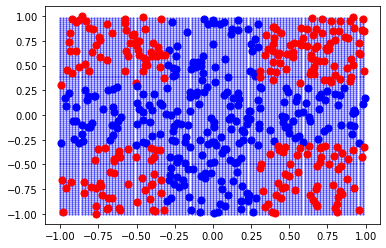

<Figure size 432x288 with 0 Axes>

In [49]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.linear_predict_model_classification(
            linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    if predicted_value > 0.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

for i in range(len(X)):
    if Y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', s=50)
plt.show()
plt.clf()


# Séparation MLP

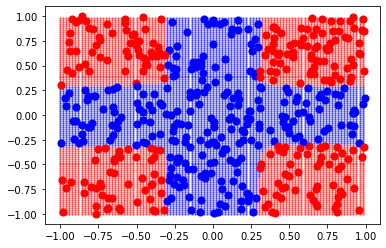

<Figure size 432x288 with 0 Axes>

In [50]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.mlp_predict_classification(
            mlp_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    
    if predicted_value > 0.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

for i in range(len(X)):
    if Y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', s=50)
plt.show()
plt.clf()


# Séparation RBF

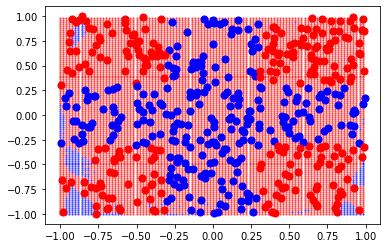

<Figure size 432x288 with 0 Axes>

In [51]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.rbf_predict_classification(
            rbf_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    
    if predicted_value > 0.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

for i in range(len(X)):
    if Y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', s=50)

clusters = my_lib.rbf_get_clusters(rbf_model)
for i in range(nb_clusters_rbf):
        plt.scatter(clusters[i * X.shape[1]], clusters[i * X.shape[1] + 1], color='yellow', s=25)


plt.show()
plt.clf()


# Libération des modèles

In [52]:
my_lib.linear_dispose_model(linear_model, len(X[0]))
my_lib.mlp_dispose(mlp_model)
my_lib.rbf_dispose(rbf_model)

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [53]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [-1, 1, -1] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [-1, -1, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [-1, -1, -1] for p in X], dtype='float64')

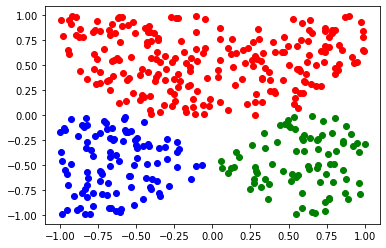

<Figure size 432x288 with 0 Axes>

In [54]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

# Création des modèles

In [62]:
flattened_X = X.flatten()
flattened_Y = Y.flatten()

first_Y = np.array([x[0] for x in Y])
first_linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

second_Y = np.array([x[1] for x in Y])
second_linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

third_Y = np.array([x[2] for x in Y])
third_linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

layers = [2, 3]
layers = np.array(layers)
mlp_model = my_lib.mlp_create_model(layers.ctypes.data_as(ctypes.POINTER(ctypes.c_int)), layers.shape[0])

rbf_model = my_lib.rbf_create_model(X.shape[0], 3, 0.3)

# Entrainement des modèles

In [63]:
nb_clusters_rbf = 0

my_lib.linear_train_model_classification(
        first_linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        first_Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        0.001,
        100000
    )
my_lib.linear_train_model_classification(
        second_linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        second_Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        0.001,
        100000
    )
my_lib.linear_train_model_classification(
        third_linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        third_Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        0.001,
        100000
    )
my_lib.mlp_train_classification(
        mlp_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        flattened_Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        Y.shape[1],
        0.01,
        10000000
    )

#RBF
my_lib.rbf_train(
        rbf_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        3,
        nb_clusters_rbf
    )

In [64]:
# Après entrainement
nb_errors_linear = [0, 0, 0]
nb_errors_mlp = [0, 0, 0]
linear_find = [0, 0, 0]
print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP'))
for i, inputs_k in enumerate(X, start=0):
    
    linear_find[0] = my_lib.linear_predict_model_classification(
        first_linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    linear_find[1] = my_lib.linear_predict_model_classification(
        second_linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    linear_find[2] = my_lib.linear_predict_model_classification(
        third_linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    mlp_find = my_lib.mlp_predict_classification(
        mlp_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )
    
    expect = Y[i]
    
    for j in range(len(Y[0])):
        if linear_find[j] != expect[j]:
            nb_errors_linear[j] += 1
        if abs(mlp_find[j] - expect[j]) > 0.5:
            nb_errors_mlp[j] += 1
    
    #print(expect, end='              ')
    #print(linear_find, end='         ')
    #print([mlp_find[x] for x in range(len(Y[0]))])
print()
print("Linear errors : ", end="")
print(nb_errors_linear)
print("MLP errors : ", end="")
print(nb_errors_mlp)

Expected              |  Linear                |  MLP                 

Linear errors : [65, 33, 51]
MLP errors : [82, 68, 72]


# Séparation Linéaire

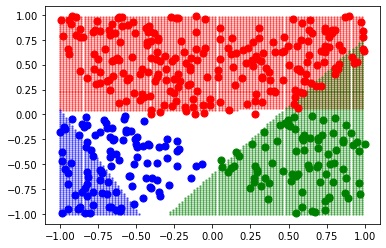

<Figure size 432x288 with 0 Axes>

In [65]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
green_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.linear_predict_model_classification(
            first_linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    if predicted_value > 0.0:
        blue_points.append(test_input_k)
        
    predicted_value = my_lib.linear_predict_model_classification(
            second_linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    if predicted_value > 0.0:
        red_points.append(test_input_k)
        
    predicted_value = my_lib.linear_predict_model_classification(
            third_linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    if predicted_value > 0.0:
        green_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)
green_points = np.array(green_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
if len(green_points) > 0:
    plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)

for i in range(len(X)):
    if Y[i][0] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
    elif Y[i][1] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='red', s=50)
    elif Y[i][2] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='green', s=50)
plt.show()
plt.clf()


# Séparation MLP

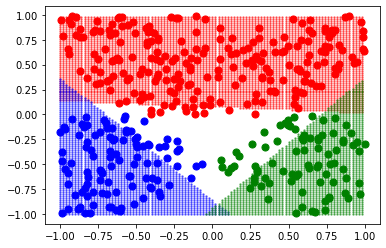

<Figure size 432x288 with 0 Axes>

In [66]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
green_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.mlp_predict_classification(
            mlp_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )
    
    if predicted_value[0] > 0.0:
        blue_points.append(test_input_k)
    if predicted_value[1] > 0.0:
        red_points.append(test_input_k)
    if predicted_value[2] > 0.0:
        green_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)
green_points = np.array(green_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
if len(green_points) > 0:
    plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)

for i in range(len(X)):
    if Y[i][0] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
    elif Y[i][1] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='red', s=50)
    elif Y[i][2] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='green', s=50)
plt.show()
plt.clf()


# Séparation RBF

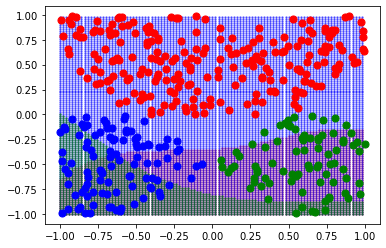

<Figure size 432x288 with 0 Axes>

In [67]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
green_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.rbf_predict_classification(
            rbf_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )
    
    if predicted_value[0] > 0.0:
        blue_points.append(test_input_k)
    if predicted_value[1] > 0.0:
        red_points.append(test_input_k)
    if predicted_value[2] > 0.0:
        green_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)
green_points = np.array(green_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
if len(green_points) > 0:
    plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)

for i in range(len(X)):
    if Y[i][0] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', s=50)
    elif Y[i][1] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='red', s=50)
    elif Y[i][2] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='green', s=50)

clusters = my_lib.rbf_get_clusters(rbf_model)
for i in range(nb_clusters_rbf):
        plt.scatter(clusters[i * X.shape[1]], clusters[i * X.shape[1] + 1], color='yellow', s=25)

plt.show()
plt.clf()


# Libération des modèles

In [61]:
my_lib.linear_dispose_model(first_linear_model, len(X[0]))
my_lib.linear_dispose_model(second_linear_model, len(X[0]))
my_lib.linear_dispose_model(third_linear_model, len(X[0]))
my_lib.mlp_dispose(mlp_model)
my_lib.rbf_dispose(rbf_model)

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [122]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, -1, -1] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [-1, 1, -1] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [-1, -1, 1] for p in X], dtype='float64')

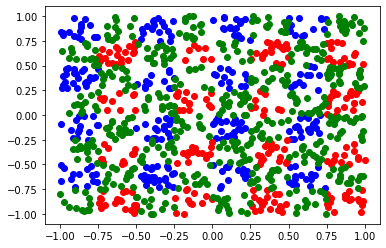

<Figure size 432x288 with 0 Axes>

In [123]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

# Création des modèles

In [124]:
flattened_X = X.flatten()
flattened_Y = Y.flatten()

first_Y = np.array([x[0] for x in Y])
first_linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

second_Y = np.array([x[1] for x in Y])
second_linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

third_Y = np.array([x[2] for x in Y])
third_linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

layers = [2, 100, 100, 3]
layers = np.array(layers)
mlp_model = my_lib.mlp_create_model(layers.ctypes.data_as(ctypes.POINTER(ctypes.c_int)), layers.shape[0])

rbf_model = my_lib.rbf_create_model(X.shape[0], 3, 0.9)

# Entrainement des modèles

In [125]:
nb_clusters_rbf = 64

my_lib.linear_train_model_classification(
        first_linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        first_Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        0.01,
        1000
    )
my_lib.linear_train_model_classification(
        second_linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        second_Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        0.01,
        1000
    )
my_lib.linear_train_model_classification(
        third_linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        third_Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        0.01,
        1000
    )
my_lib.mlp_train_classification(
        mlp_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        flattened_Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        Y.shape[1],
        0.001,
        500000
    )
#RBF
my_lib.rbf_train(
        rbf_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        3,
        nb_clusters_rbf
    )

In [126]:
# Après entrainement
nb_errors_linear = [0, 0, 0]
nb_errors_mlp = [0, 0, 0]
linear_find = [0, 0, 0]
print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP'))
for i, inputs_k in enumerate(X, start=0):
    
    linear_find[0] = my_lib.linear_predict_model_classification(
        first_linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    linear_find[1] = my_lib.linear_predict_model_classification(
        second_linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    linear_find[2] = my_lib.linear_predict_model_classification(
        third_linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    mlp_find = my_lib.mlp_predict_classification(
        mlp_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    expect = Y[i]
    
    for j in range(len(Y[0])):
        if linear_find[j] != expect[j]:
            nb_errors_linear[j] += 1
        if abs(mlp_find[j] - expect[j]) > 0.5:
            nb_errors_mlp[j] += 1
    
    #print(expect, end='              ')
    #print(linear_find, end='         ')
    #print([mlp_find[x] for x in range(len(Y[0]))])
print()
print("Linear errors : ", end="")
print(nb_errors_linear)
print("MLP errors : ", end="")
print(nb_errors_mlp)

Expected              |  Linear                |  MLP                 

Linear errors : [688, 255, 474]
MLP errors : [72, 110, 325]


# Séparation Linéaire

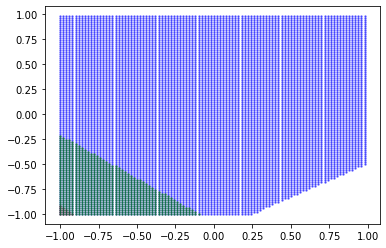

<Figure size 432x288 with 0 Axes>

In [127]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
green_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.linear_predict_model_classification(
            first_linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    if predicted_value > 0.0:
        blue_points.append(test_input_k)
        
    predicted_value = my_lib.linear_predict_model_classification(
            second_linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    if predicted_value > 0.0:
        red_points.append(test_input_k)
        
    predicted_value = my_lib.linear_predict_model_classification(
            third_linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    if predicted_value > 0.0:
        green_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)
green_points = np.array(green_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
if len(green_points) > 0:
    plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)

def display_points(size=50):
    for i in range(len(X)):
        if Y[i][0] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='blue', s=size)
        elif Y[i][1] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='red', s=size)
        elif Y[i][2] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='green', s=size)

#display_points()
plt.show()
plt.clf()


# Séparation MLP

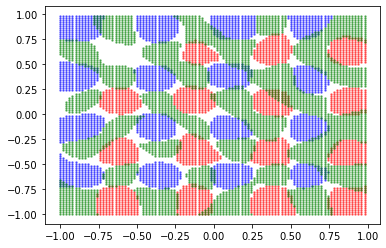

<Figure size 432x288 with 0 Axes>

In [128]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
green_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.mlp_predict_classification(
            mlp_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )
    
    if predicted_value[0] > 0.0:
        blue_points.append(test_input_k)
    if predicted_value[1] > 0.0:
        red_points.append(test_input_k)
    if predicted_value[2] > 0.0:
        green_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)
green_points = np.array(green_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
if len(green_points) > 0:
    plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)

def display_points(size=50):
    for i in range(len(X)):
        if Y[i][0] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='blue', s=size)
        elif Y[i][1] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='red', s=size)
        elif Y[i][2] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='green', s=size)

#display_points()
plt.show()
plt.clf()


# Séparation RBF

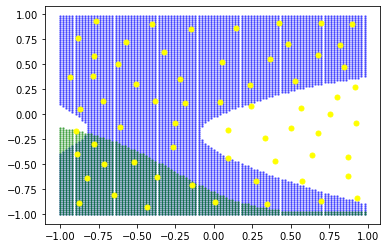

<Figure size 432x288 with 0 Axes>

In [129]:
test_points = np.array([[i, j] for i in range(100) for j in range(100)], dtype='float64') / 100 * 2 - 1

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
green_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.rbf_predict_classification(
            rbf_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )
    
    if predicted_value[0] > 0.0:
        blue_points.append(test_input_k)
    if predicted_value[1] > 0.0:
        red_points.append(test_input_k)
    if predicted_value[2] > 0.0:
        green_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)
green_points = np.array(green_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
if len(green_points) > 0:
    plt.scatter(green_points[:, 0], green_points[:, 1], color='green', alpha=0.5, s=2)

def display_points(size=50):
    for i in range(len(X)):
        if Y[i][0] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='blue', s=size)
        elif Y[i][1] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='red', s=size)
        elif Y[i][2] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='green', s=size)

#display_points()

clusters = my_lib.rbf_get_clusters(rbf_model)
for i in range(nb_clusters_rbf):
        plt.scatter(clusters[i * X.shape[1]], clusters[i * X.shape[1] + 1], color='yellow', s=25)
        
plt.show()
plt.clf()


# Libération des modèles

In [130]:
my_lib.linear_dispose_model(first_linear_model, len(X[0]))
my_lib.linear_dispose_model(second_linear_model, len(X[0]))
my_lib.linear_dispose_model(third_linear_model, len(X[0]))
my_lib.mlp_dispose(mlp_model)
my_lib.rbf_dispose(rbf_model)

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [131]:
X = np.array([
      [1.0],
      [2.0]
])
Y = np.array([
      2.0,
      3.0
])

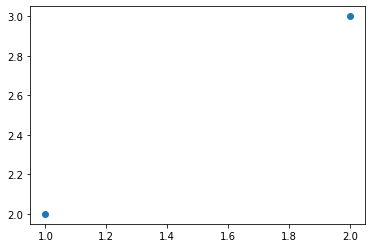

1


<Figure size 432x288 with 0 Axes>

In [132]:
plt.scatter(X,Y)
plt.show()
plt.clf()
print(X.shape[1])

# Création des modèles

In [133]:
flattened_X = X.flatten()

linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

layers = [1, 1]
layers = np.array(layers)
mlp_model = my_lib.mlp_create_model(layers.ctypes.data_as(ctypes.POINTER(ctypes.c_int)), layers.shape[0])

rbf_model = my_lib.rbf_create_model(X.shape[0], 1, 0.01)

# Entrainement des modèles

In [134]:
my_lib.linear_train_model_regression(
        linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1]
    )

my_lib.mlp_train_regression(
        mlp_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        0.001,
        100000
    )

#RBF
my_lib.rbf_train(
        rbf_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        0
    )

In [135]:
# Après entrainement
nb_errors_linear = 0
nb_errors_mlp = 0
print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP'))
for i, inputs_k in enumerate(X, start=0):
    linear_find = my_lib.linear_predict_model_regression(
        linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    mlp_find = my_lib.mlp_predict_regression(
        mlp_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    )[0]
    
    expect = Y[i]
    
    if abs(linear_find - expect) > 0.1:
        nb_errors_linear += 1
    if abs(mlp_find - expect) > 0.1:
        nb_errors_mlp += 1
    
    print('{: <20}'.format(expect) + '  |  ' + '{: <20}'.format(linear_find) + '  |  ' + '{: <20}'.format(mlp_find))
print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))

Expected              |  Linear                |  MLP                 
2.0                   |  2.0000000000000018    |  2.0000916799641075  
3.0                   |  3.0000000000000027    |  2.9999424777590367  

Linear errors : 0
MLP errors : 0


# Régression Linéaire

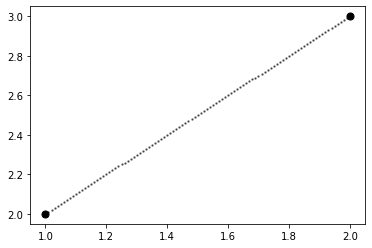

<Figure size 432x288 with 0 Axes>

In [136]:
test_points = np.array([[i] for i in range(100)], dtype='float64') / 100 + 1

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.linear_predict_model_regression(
            linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    predicted_points.append([test_input_k[0], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    plt.scatter(i[0], i[1], color='black', alpha=0.5, s=2)
plt.scatter(X, Y, color='black', s=50)

plt.show()
plt.clf()


# Régression MLP

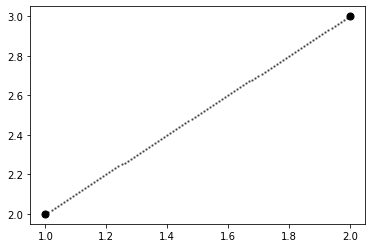

<Figure size 432x288 with 0 Axes>

In [137]:
test_points = np.array([[i] for i in range(100)], dtype='float64') / 100 + 1

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.mlp_predict_regression(
            mlp_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    predicted_points.append([test_input_k[0], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    plt.scatter(i[0], i[1], color='black', alpha=0.5, s=2)
plt.scatter(X, Y, color='black', s=50)

plt.show()
plt.clf()

# Régression RBF

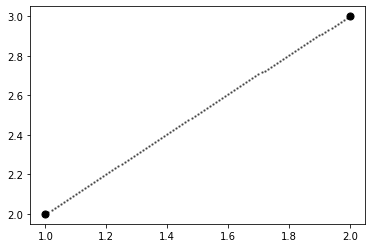

<Figure size 432x288 with 0 Axes>

In [138]:
test_points = np.array([[i] for i in range(100)], dtype='float64') / 100 + 1

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.rbf_predict_regression(
            rbf_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    predicted_points.append([test_input_k[0], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    plt.scatter(i[0], i[1], color='black', alpha=0.5, s=2)
plt.scatter(X, Y, color='black', s=50)

plt.show()
plt.clf()

# Libération des modèles

In [139]:
my_lib.linear_dispose_model(linear_model, len(X[0]))
my_lib.mlp_dispose(mlp_model)
my_lib.rbf_dispose(rbf_model)

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [140]:
X = np.array([
      [1.0],
      [2.0],
      [3.0]
])
Y = np.array([
      2.0,
      3.0,
      2.5
])

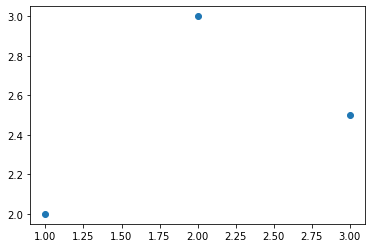

<Figure size 432x288 with 0 Axes>

In [141]:
plt.scatter(X,Y)
plt.show()
plt.clf()

# Création des modèles

In [142]:
flattened_X = X.flatten()

linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

layers = [1, 3, 1]
layers = np.array(layers)
mlp_model = my_lib.mlp_create_model(layers.ctypes.data_as(ctypes.POINTER(ctypes.c_int)), layers.shape[0])
rbf_model = my_lib.rbf_create_model(X.shape[0], 1, 0.01)

# Entrainement des modèles

In [143]:
my_lib.linear_train_model_regression(
        linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1]
    )

my_lib.mlp_train_regression(
        mlp_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        0.01,
        100000
    )
#RBF
my_lib.rbf_train(
        rbf_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        0
    )

In [144]:
# Après entrainement
nb_errors_linear = 0
nb_errors_mlp = 0
print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP'))
for i, inputs_k in enumerate(X, start=0):
    linear_find = my_lib.linear_predict_model_regression(
        linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    mlp_find = my_lib.mlp_predict_regression(
        mlp_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    )[0]
    
    expect = Y[i]
    
    if abs(linear_find - expect) > 0.1:
        nb_errors_linear += 1
    if abs(mlp_find - expect) > 0.1:
        nb_errors_mlp += 1
    
    print('{: <20}'.format(expect) + '  |  ' + '{: <20}'.format(linear_find) + '  |  ' + '{: <20}'.format(mlp_find))
print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))

Expected              |  Linear                |  MLP                 
2.0                   |  2.249999999999998     |  2.000000000000044   
3.0                   |  2.499999999999998     |  2.999999999999937   
2.5                   |  2.749999999999998     |  2.500000000000107   

Linear errors : 3
MLP errors : 0


# Régression Linéaire

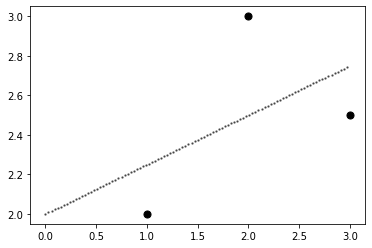

<Figure size 432x288 with 0 Axes>

In [145]:
test_points = np.array([[i] for i in range(100)], dtype='float64') / 100 * X.shape[0]

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.linear_predict_model_regression(
            linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    predicted_points.append([test_input_k[0], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    plt.scatter(i[0], i[1], color='black', alpha=0.5, s=2)
plt.scatter(X, Y, color='black', s=50)

plt.show()
plt.clf()


# Régression MLP

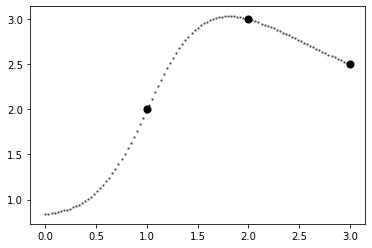

<Figure size 432x288 with 0 Axes>

In [146]:
test_points = np.array([[i] for i in range(100)], dtype='float64') / 100 * X.shape[0]

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.mlp_predict_regression(
            mlp_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    predicted_points.append([test_input_k[0], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    plt.scatter(i[0], i[1], color='black', alpha=0.5, s=2)
plt.scatter(X, Y, color='black', s=50)

plt.show()
plt.clf()

# Régression RBF

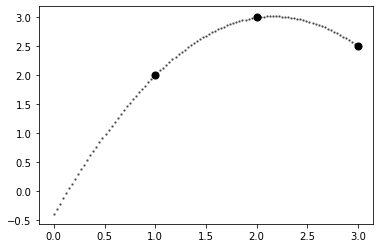

<Figure size 432x288 with 0 Axes>

In [147]:
test_points = np.array([[i] for i in range(100)], dtype='float64') / 100 * X.shape[0]

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.rbf_predict_regression(
            rbf_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    predicted_points.append([test_input_k[0], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    plt.scatter(i[0], i[1], color='black', alpha=0.5, s=2)
plt.scatter(X, Y, color='black', s=50)

plt.show()
plt.clf()

# Libération des modèles

In [148]:
my_lib.linear_dispose_model(linear_model, len(X[0]))
my_lib.mlp_dispose(mlp_model)
my_lib.rbf_dispose(rbf_model)

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [149]:
X = np.array([
      [1.0, 1.0],
      [2.0, 2.0],
      [3.0, 1.0]
])
Y = np.array([
      2.0,
      3.0,
      2.5
])

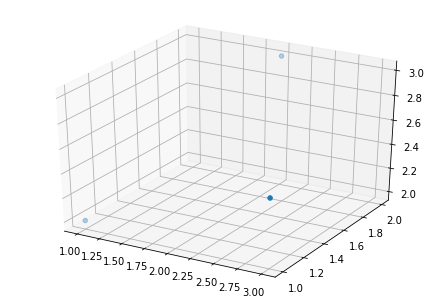

<Figure size 432x288 with 0 Axes>

In [150]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# Création des modèles

In [151]:
flattened_X = X.flatten()

linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

layers = [2, 1]
layers = np.array(layers)
mlp_model = my_lib.mlp_create_model(layers.ctypes.data_as(ctypes.POINTER(ctypes.c_int)), layers.shape[0])

rbf_model = my_lib.rbf_create_model(X.shape[0], 1, 0.01)

# Entrainement des modèles

In [152]:
my_lib.linear_train_model_regression(
        linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1]
    )

my_lib.mlp_train_regression(
        mlp_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        0.01,
        100000
    )
#RBF
my_lib.rbf_train(
        rbf_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        0
    )

In [153]:
# Après entrainement
nb_errors_linear = 0
nb_errors_mlp = 0
print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP'))
for i, inputs_k in enumerate(X, start=0):
    linear_find = my_lib.linear_predict_model_regression(
        linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    mlp_find = my_lib.mlp_predict_regression(
        mlp_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    )[0]
    
    expect = Y[i]
    
    if abs(linear_find - expect) > 0.1:
        nb_errors_linear += 1
    if abs(mlp_find - expect) > 0.1:
        nb_errors_mlp += 1
    
    print('{: <20}'.format(expect) + '  |  ' + '{: <20}'.format(linear_find) + '  |  ' + '{: <20}'.format(mlp_find))
print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))

Expected              |  Linear                |  MLP                 
2.0                   |  0.9999999999999583    |  1.9999999999999947  
3.0                   |  3.4999999999999565    |  3.0000000000000018  
2.5                   |  3.999999999999962     |  2.5000000000000004  

Linear errors : 3
MLP errors : 0


# Régression Linéaire

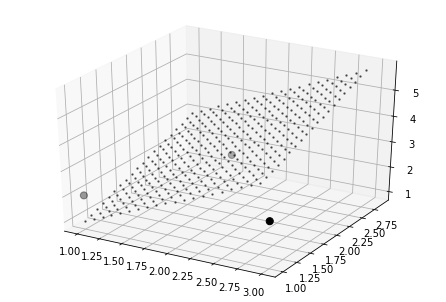

<Figure size 432x288 with 0 Axes>

In [154]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 + 1

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.linear_predict_model_regression(
            linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    predicted_points.append([test_input_k[0], test_input_k[1], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    ax.scatter(i[0], i[1], i[2], color='black', alpha=0.5, s=2)
ax.scatter(X[:,0],X[:,1],Y, color='black', s=50)

plt.show()
plt.clf()


# Régression MLP

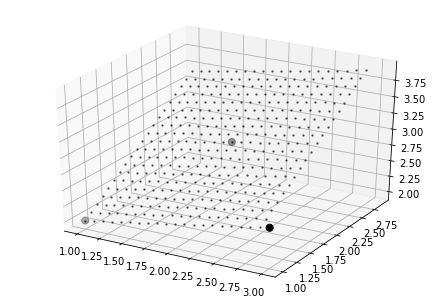

<Figure size 432x288 with 0 Axes>

In [155]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 + 1

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.mlp_predict_regression(
            mlp_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    predicted_points.append([test_input_k[0], test_input_k[1], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    ax.scatter(i[0], i[1], i[2], color='black', alpha=0.5, s=2)
ax.scatter(X[:,0],X[:,1],Y, color='black', s=50)

plt.show()
plt.clf()

# Régression RBF

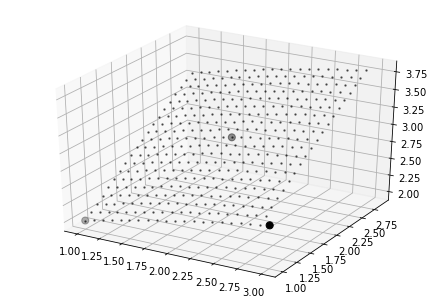

<Figure size 432x288 with 0 Axes>

In [156]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 + 1

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.rbf_predict_regression(
            rbf_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    predicted_points.append([test_input_k[0], test_input_k[1], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    ax.scatter(i[0], i[1], i[2], color='black', alpha=0.5, s=2)
ax.scatter(X[:,0],X[:,1],Y, color='black', s=50)

plt.show()
plt.clf()

# Libération des modèles

In [157]:
my_lib.linear_dispose_model(linear_model, len(X[0]))
my_lib.mlp_dispose(mlp_model)
my_lib.rbf_dispose(rbf_model)

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [158]:
X = np.array([
      [1.0, 1.0],
      [2.0, 2.0],
      [3.0, 3.0]
])
Y = np.array([
      1.0,
      2.0,
      3.0
])

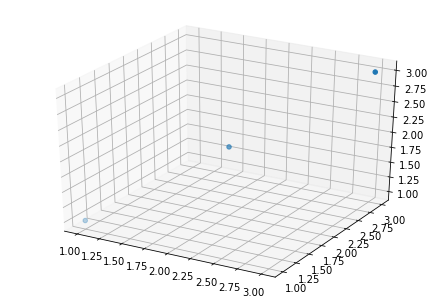

<Figure size 432x288 with 0 Axes>

In [159]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# Création des modèles

In [160]:
flattened_X = X.flatten()

linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

layers = [2, 1]
layers = np.array(layers)
mlp_model = my_lib.mlp_create_model(layers.ctypes.data_as(ctypes.POINTER(ctypes.c_int)), layers.shape[0])

rbf_model = my_lib.rbf_create_model(X.shape[0], 1, 0.01)

# Entrainement des modèles

In [161]:
my_lib.linear_train_model_regression(
        linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1]
    )

my_lib.mlp_train_regression(
        mlp_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        0.01,
        100000
    )
#RBF
my_lib.rbf_train(
        rbf_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        0
    )

In [162]:
# Après entrainement
nb_errors_linear = 0
nb_errors_mlp = 0
print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP'))
for i, inputs_k in enumerate(X, start=0):
    linear_find = my_lib.linear_predict_model_regression(
        linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    mlp_find = my_lib.mlp_predict_regression(
        mlp_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    )[0]
    
    expect = Y[i]
    
    if abs(linear_find - expect) > 0.1:
        nb_errors_linear += 1
    if abs(mlp_find - expect) > 0.1:
        nb_errors_mlp += 1
    
    print('{: <20}'.format(expect) + '  |  ' + '{: <20}'.format(linear_find) + '  |  ' + '{: <20}'.format(mlp_find))
print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))

Expected              |  Linear                |  MLP                 
1.0                   |  0.0                   |  0.9999999999999991  
2.0                   |  2.0                   |  2.0                 
3.0                   |  4.0                   |  3.000000000000001   

Linear errors : 2
MLP errors : 0


# Régression Linéaire

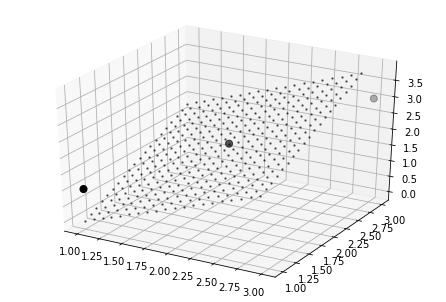

<Figure size 432x288 with 0 Axes>

In [163]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 + 1

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.linear_predict_model_regression(
            linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    predicted_points.append([test_input_k[0], test_input_k[1], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    ax.scatter(i[0], i[1], i[2], color='black', alpha=0.5, s=2)
ax.scatter(X[:,0],X[:,1],Y, color='black', s=50)

plt.show()
plt.clf()


# Régression MLP

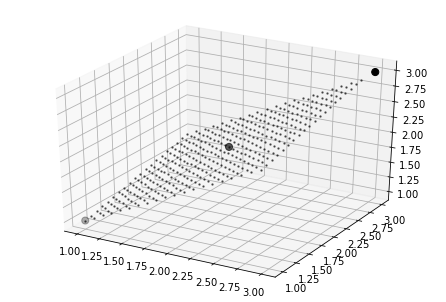

<Figure size 432x288 with 0 Axes>

In [164]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 + 1

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.mlp_predict_regression(
            mlp_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    predicted_points.append([test_input_k[0], test_input_k[1], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    ax.scatter(i[0], i[1], i[2], color='black', alpha=0.5, s=2)
ax.scatter(X[:,0],X[:,1],Y, color='black', s=50)

plt.show()
plt.clf()

# Régression RBF

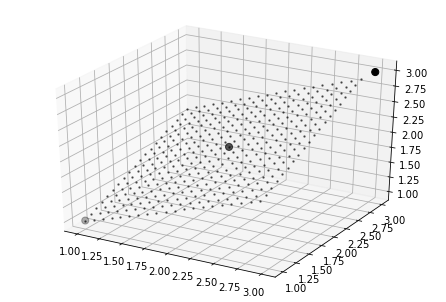

<Figure size 432x288 with 0 Axes>

In [165]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 + 1

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.rbf_predict_regression(
            rbf_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    predicted_points.append([test_input_k[0], test_input_k[1], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    ax.scatter(i[0], i[1], i[2], color='black', alpha=0.5, s=2)
ax.scatter(X[:,0],X[:,1],Y, color='black', s=50)

plt.show()
plt.clf()

# Libération des modèles

In [166]:
my_lib.linear_dispose_model(linear_model, len(X[0]))
my_lib.mlp_dispose(mlp_model)
my_lib.rbf_dispose(rbf_model)

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [167]:
X = np.array([
      [1.0, 0.0],
      [0.0, 1.0],
      [1.0, 1.0],
      [0.0, 0.0],
])
Y = np.array([
      2.0,
      1.0,
      -2.0,
      -1.0
])

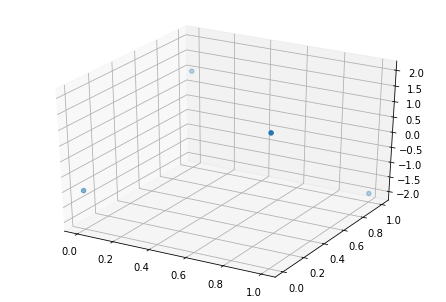

<Figure size 432x288 with 0 Axes>

In [168]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

# Création des modèles

In [169]:
flattened_X = X.flatten()

linear_model = my_lib.linear_create_model(ctypes.c_int(len(X[0])))

layers = [2, 2, 1]
layers = np.array(layers)
mlp_model = my_lib.mlp_create_model(layers.ctypes.data_as(ctypes.POINTER(ctypes.c_int)), layers.shape[0])

rbf_model = my_lib.rbf_create_model(X.shape[0], 1, 0.01)

# Entrainement des modèles

In [170]:
my_lib.linear_train_model_regression(
        linear_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1]
    )

my_lib.mlp_train_regression(
        mlp_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        0.01,
        100000
    )

#RBF
my_lib.rbf_train(
        rbf_model,
        flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        X.shape[0],
        X.shape[1],
        Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        1,
        0
    )

In [171]:
# Après entrainement
nb_errors_linear = 0
nb_errors_mlp = 0
print('{: <20}'.format('Expected') + '  |  ' + '{: <20}'.format('Linear') + '  |  ' + '{: <20}'.format('MLP'))
for i, inputs_k in enumerate(X, start=0):
    linear_find = my_lib.linear_predict_model_regression(
        linear_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(inputs_k)
    )
    
    mlp_find = my_lib.mlp_predict_regression(
        mlp_model,
        inputs_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    )[0]
    
    expect = Y[i]
    
    if abs(linear_find - expect) > 0.1:
        nb_errors_linear += 1
    if abs(mlp_find - expect) > 0.1:
        nb_errors_mlp += 1
    
    print('{: <20}'.format(expect) + '  |  ' + '{: <20}'.format(linear_find) + '  |  ' + '{: <20}'.format(mlp_find))
print()
print("Linear errors : " + str(nb_errors_linear))
print("MLP errors : " + str(nb_errors_mlp))

Expected              |  Linear                |  MLP                 
2.0                   |  -1.0                  |  1.9586722398253276  
1.0                   |  1.0                   |  -0.5661667378075561 
-2.0                  |  2.0                   |  -0.5646684121289187 
-1.0                  |  -2.0                  |  -1.018731884127212  

Linear errors : 3
MLP errors : 2


# Régression Linéaire

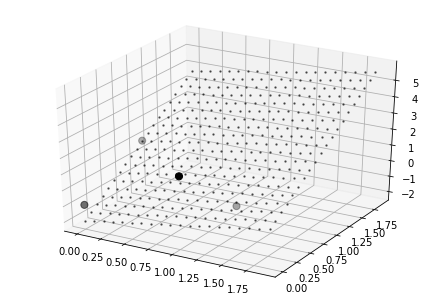

<Figure size 432x288 with 0 Axes>

In [172]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.linear_predict_model_regression(
            linear_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
            len(test_input_k))
    predicted_points.append([test_input_k[0], test_input_k[1], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    ax.scatter(i[0], i[1], i[2], color='black', alpha=0.5, s=2)
ax.scatter(X[:,0],X[:,1],Y, color='black', s=50)

plt.show()
plt.clf()


# Régression MLP

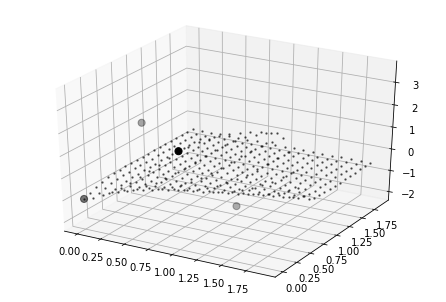

<Figure size 432x288 with 0 Axes>

In [173]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.mlp_predict_regression(
            mlp_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    predicted_points.append([test_input_k[0], test_input_k[1], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    ax.scatter(i[0], i[1], i[2], color='black', alpha=0.5, s=2)
ax.scatter(X[:,0],X[:,1],Y, color='black', s=50)

plt.show()
plt.clf()

# Régression RBF

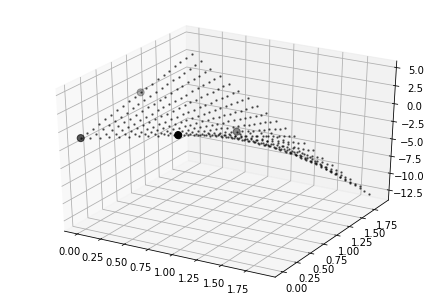

<Figure size 432x288 with 0 Axes>

In [174]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

test_points = np.array([[i, j] for i in range(20) for j in range(20)], dtype='float64') / 20 * 2 

test_points_predicted = np.zeros(len(test_points))
predicted_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.rbf_predict_regression(
            rbf_model,
            test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    )[0]
    predicted_points.append([test_input_k[0], test_input_k[1], predicted_value])

predicted_points = np.array(predicted_points)
for i in predicted_points:
    ax.scatter(i[0], i[1], i[2], color='black', alpha=0.5, s=2)
ax.scatter(X[:,0],X[:,1],Y, color='black', s=50)

plt.show()
plt.clf()

# Libération des modèles

In [175]:
my_lib.linear_dispose_model(linear_model, len(X[0]))
my_lib.mlp_dispose(mlp_model)
my_lib.rbf_dispose(rbf_model)